In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dff=df.drop(columns = "State")

In [5]:
df1 = dff.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'MKTS'},axis=1)

In [6]:
df1.head()

,RDS,Admin,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
df1.describe()

,RDS,Admin,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df1.corr()

,RDS,Admin,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
x= df1.drop(columns="Profit")
x.head()

,RDS,Admin,MKTS
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [10]:
y=df1["Profit"]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [64]:
# pair plot

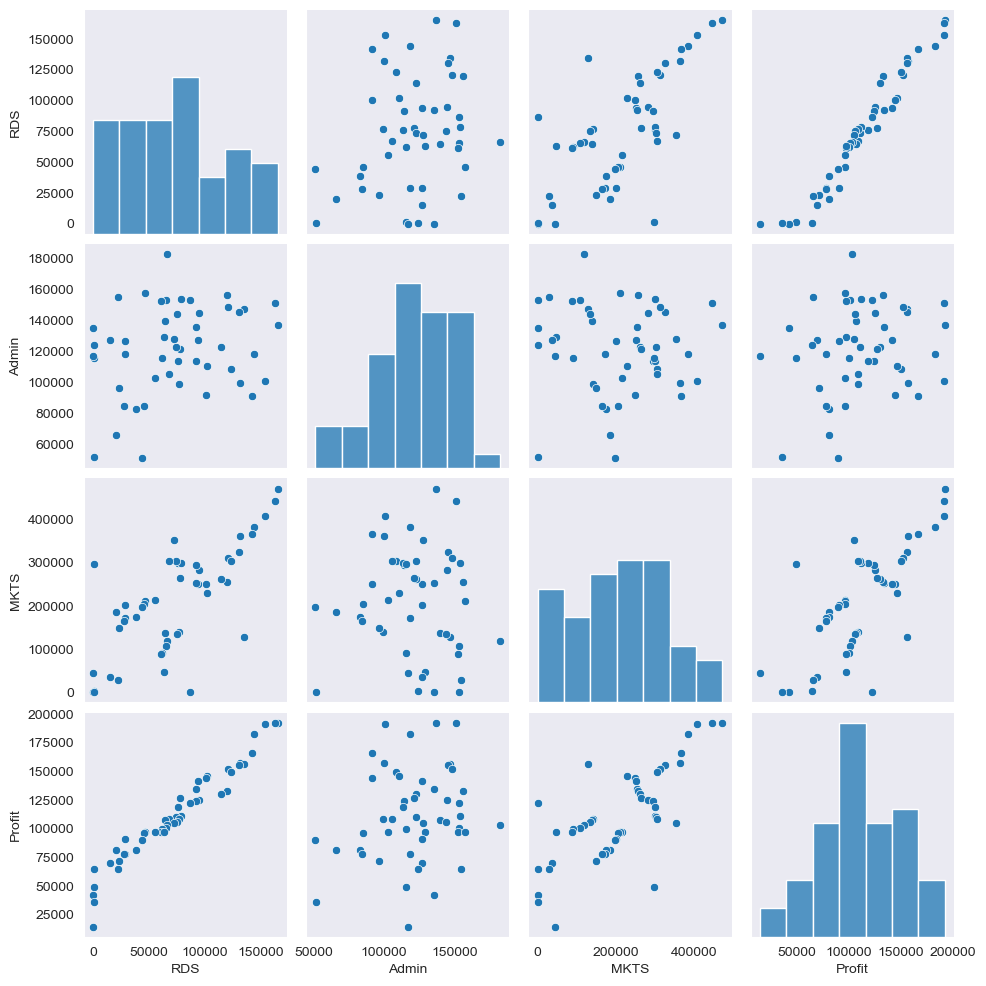

In [67]:
sns.set_style(style='dark')
sns.pairplot(df1)
plt.show()

In [31]:
# Influence plot

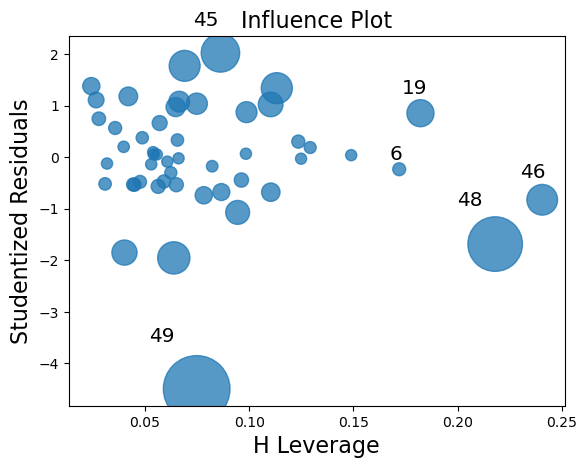

In [30]:
start_ups = smf.ols('Profit ~ RDS + Admin + MKTS',data=df1).fit()
sm.graphics.influence_plot(start_ups)
plt.show()

In [ ]:
# Cooks Distance and plot

In [32]:
np.set_printoptions(suppress=True)

In [35]:
influence = start_ups.get_influence()

In [91]:
(c,_)=start_ups.get_influence().cooks_distance
c


array([0.00003218, 0.00327591, 0.03238427, 0.02172066, 0.0144833 ,
       0.01171585, 0.00291766, 0.00356513, 0.00004043, 0.00486758,
       0.01510648, 0.0163565 , 0.01155166, 0.00401423, 0.06129343,
       0.03400134, 0.00833556, 0.00330534, 0.00216819, 0.04074406,
       0.00042514, 0.01098444, 0.00291768, 0.00027603, 0.00504644,
       0.00300075, 0.00341957, 0.02983964, 0.00131591, 0.00012599,
       0.00004185, 0.00000927, 0.00070866, 0.00012812, 0.0209815 ,
       0.00669509, 0.05553147, 0.00006551, 0.05615473, 0.0015428 ,
       0.00184851, 0.00197578, 0.00013609, 0.02055532, 0.00012316,
       0.09032342, 0.05453034, 0.00533886, 0.19052744, 0.28808229])

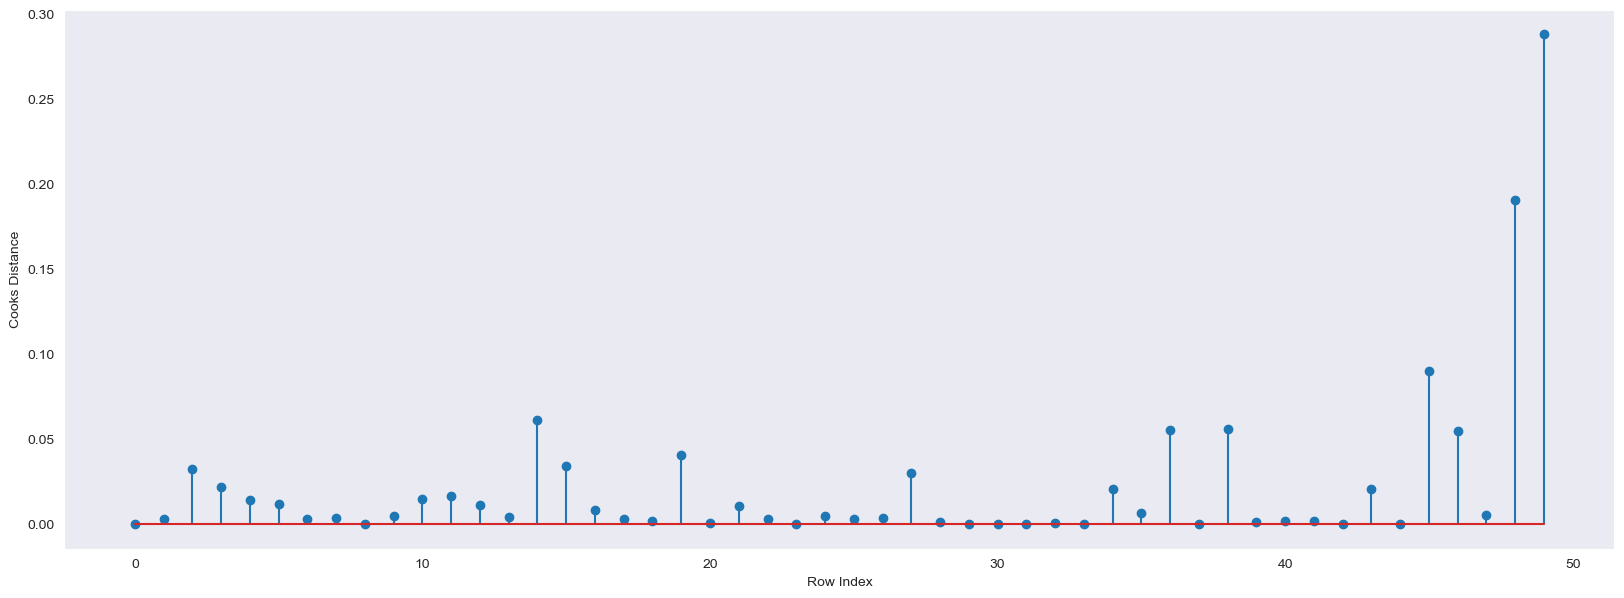

In [96]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
# Q-Q Plot

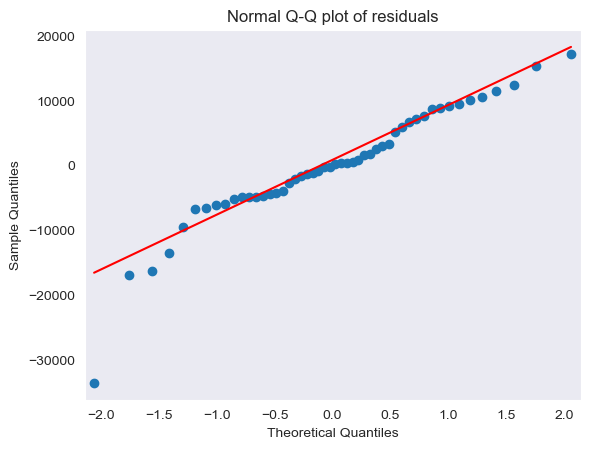

In [68]:
sm.qqplot(start_ups.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

eval_env: 1


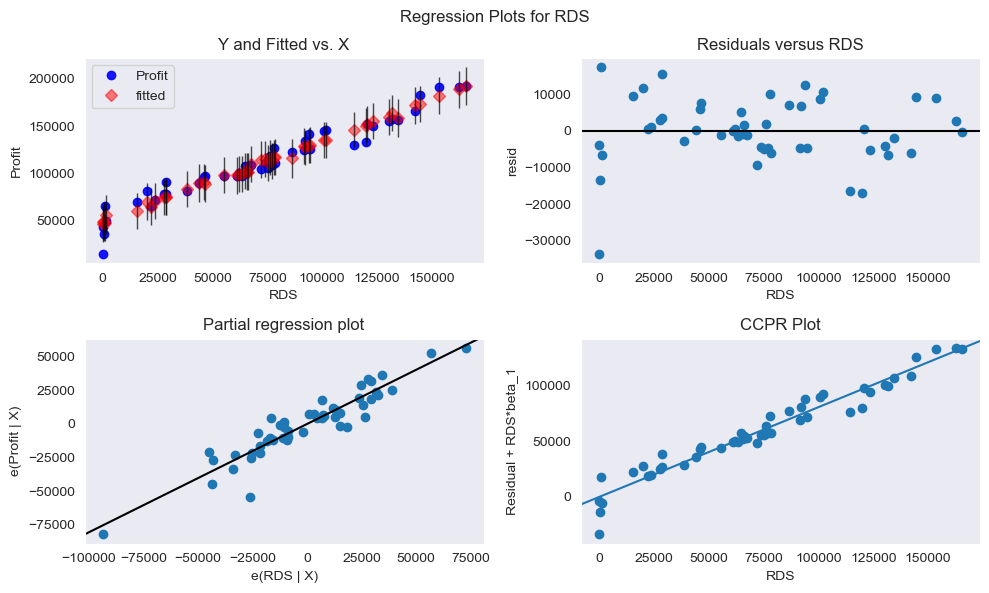

In [74]:
fig=plt.figure(figsize=(10,6))
sm.graphics.plot_regress_exog(start_ups,'RDS',fig=fig)
plt.show()

eval_env: 1


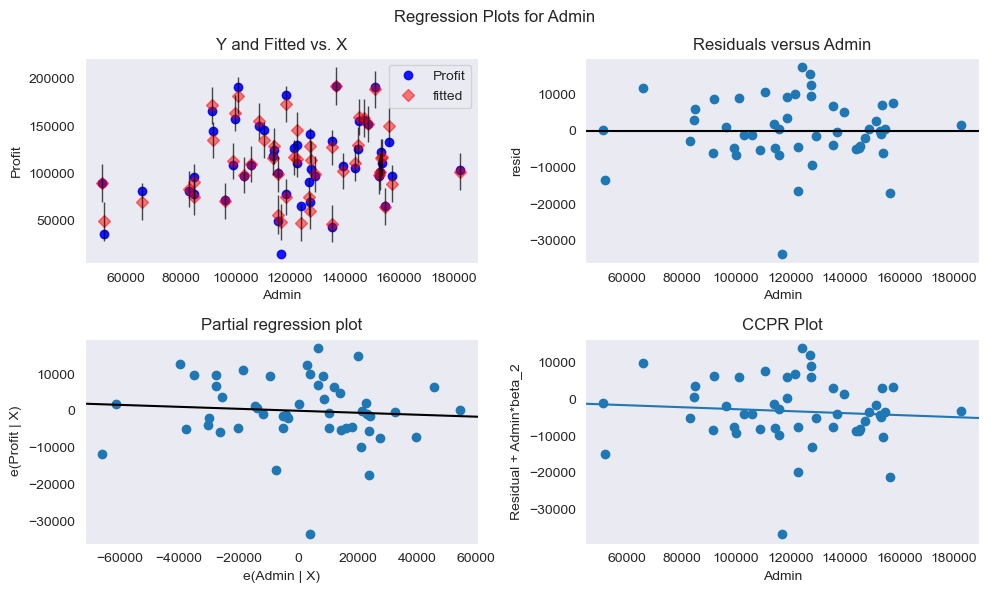

In [76]:
fig=plt.figure(figsize=(10,6))
sm.graphics.plot_regress_exog(start_ups,'Admin',fig=fig)
plt.show()

eval_env: 1


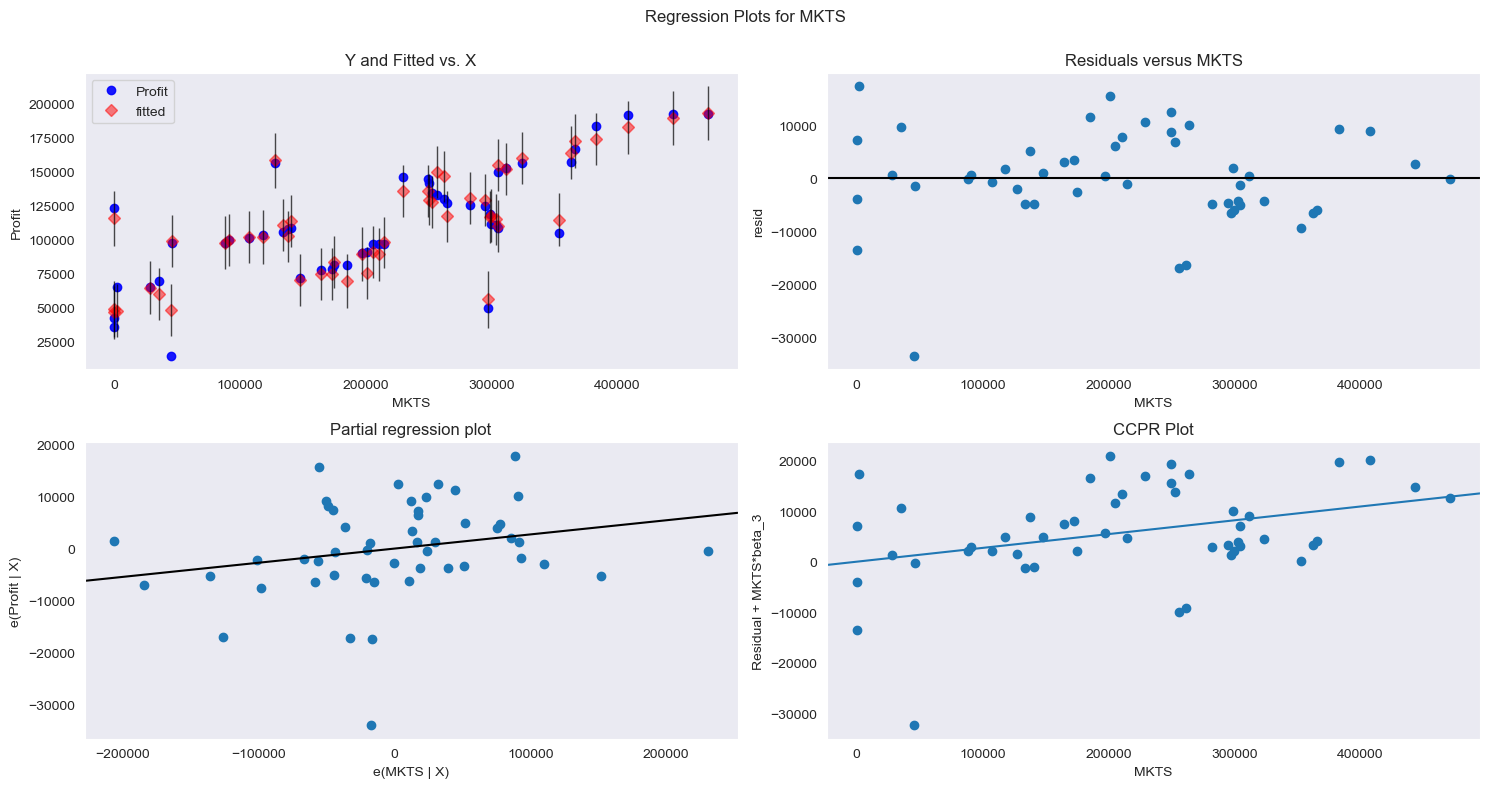

In [78]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(start_ups,'MKTS',fig=fig)
plt.show()

In [89]:
(c,_)=start_ups.get_influence().cooks_distance
c

array([0.00003218, 0.00327591, 0.03238427, 0.02172066, 0.0144833 ,
       0.01171585, 0.00291766, 0.00356513, 0.00004043, 0.00486758,
       0.01510648, 0.0163565 , 0.01155166, 0.00401423, 0.06129343,
       0.03400134, 0.00833556, 0.00330534, 0.00216819, 0.04074406,
       0.00042514, 0.01098444, 0.00291768, 0.00027603, 0.00504644,
       0.00300075, 0.00341957, 0.02983964, 0.00131591, 0.00012599,
       0.00004185, 0.00000927, 0.00070866, 0.00012812, 0.0209815 ,
       0.00669509, 0.05553147, 0.00006551, 0.05615473, 0.0015428 ,
       0.00184851, 0.00197578, 0.00013609, 0.02055532, 0.00012316,
       0.09032342, 0.05453034, 0.00533886, 0.19052744, 0.28808229])

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
md = LinearRegression()

In [15]:
md.fit(x_train,y_train)

LinearRegression()

In [16]:
c= md.intercept_
c

42448.528619571734

In [17]:
m= md.coef_
m

array([0.79045925, 0.03114407, 0.03137206])

In [18]:
yp_train = md.predict(x_train)
yp_train

array([160136.96930361, 150181.63601236,  47165.53108055,  44488.48943544,
       102434.18075449, 145006.02381207,  97913.15425076,  98040.86284406,
       116194.83732626,  68774.55738733, 115640.10975582,  59787.16007991,
       152140.1442941 , 127311.25274765, 102237.77258191, 161184.19036111,
       130654.40218885,  74290.61817989,  47509.05258118, 189615.91220478,
       128447.25198992,  85062.41354634, 110850.82613475, 157447.67674777,
       108684.98330427,  75372.87394935, 118604.71839325, 115540.83448865,
       152892.34013692,  81001.94886382,  56416.42813917, 172286.72314823,
       192214.72908284,  46666.27433881,  65689.34055377])

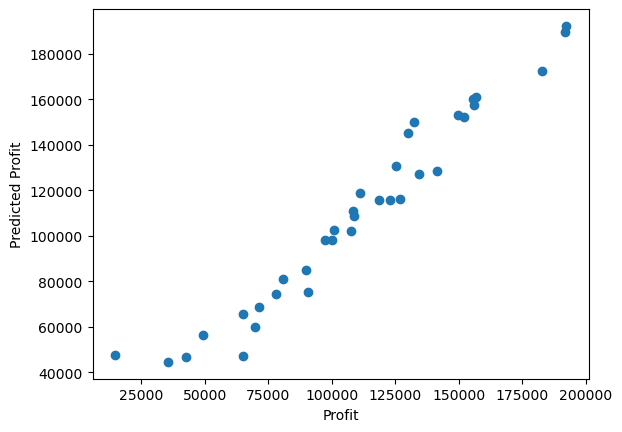

In [19]:
plt.scatter(y_train,yp_train)
plt.xlabel("Profit")
plt.ylabel("Predicted Profit")
plt.show()

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_train,yp_train)

0.9515391457049143

In [22]:
# r2_score is closer to 1 so the train model is accepteble 

In [23]:
yp_test = md.predict(x_test)
yp_test

array([104054.44293869, 132719.3459701 , 133640.26830949,  72294.76911458,
       179685.62227843, 114508.97572031,  66305.23069863,  98297.69326565,
       114277.91894933, 169112.36095691,  96257.40152149,  87916.97242208,
       110687.33942598,  90670.8337806 , 127780.63539583])

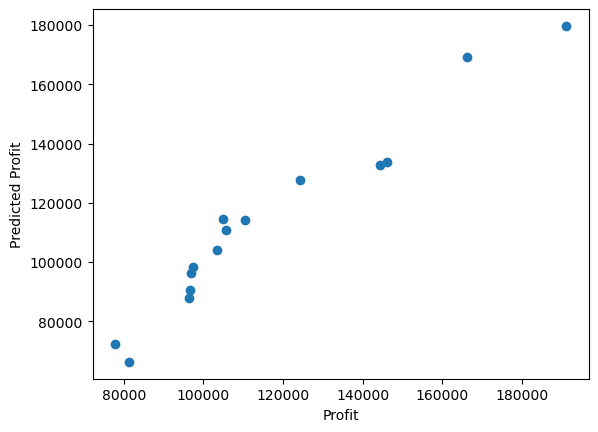

In [24]:
plt.scatter(y_test,yp_test)
plt.xlabel("Profit")
plt.ylabel("Predicted Profit")
plt.show()

In [25]:
r2_score(y_test,yp_test)

0.9355188337118217

In [26]:
# r2_score is closer to 1 so the test model is accepteble 


In [ ]:
# Regression plot for train data and predicted data

<Axes: xlabel='Profit'>

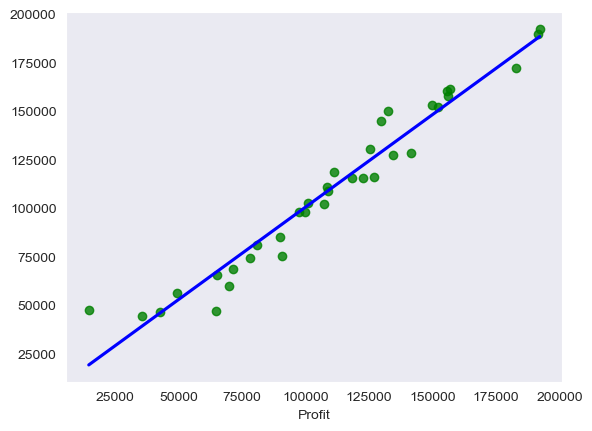

In [143]:
sns.regplot(x=y_train,y=yp_train,ci=None,color ='g',
           line_kws={'color':'b'})

In [124]:
# Regression plot for test data and predicted data

<Axes: xlabel='Profit'>

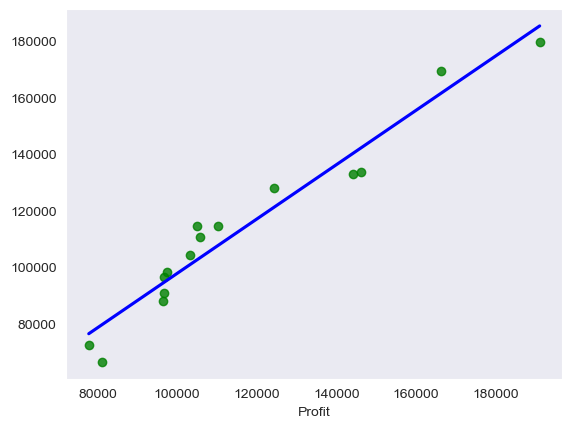

In [144]:
sns.regplot(x=y_test,y=yp_test,ci=None,color ='g',
           line_kws={'color':'b'})

In [ ]:
# predicted plot = Orange 
# original plot = Blue

<Axes: xlabel='Profit'>

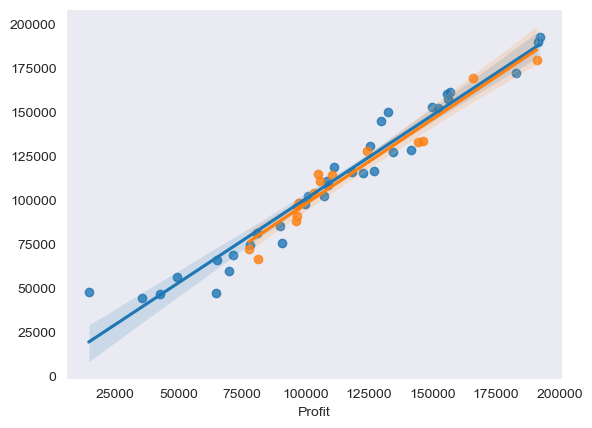

In [147]:
sns.regplot(x = y_train,
            y = yp_train,
            data = df1)
sns.regplot(x = y_test,
            y = yp_test,
            data = df1)